<a href="https://colab.research.google.com/github/Y07-assine/Page-View-Time-Series-Visualizer/blob/main/Page_View_Time_Series_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the packages

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Import data

In [14]:
df = pd.read_csv('/content/fcc-forum-pageviews.csv',parse_dates=["date"],index_col='date')

In [15]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [4]:
df.shape

(1304, 1)

In [5]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [7]:
df.value

date
2016-05-09      1201
2016-05-10      2329
2016-05-11      1716
2016-05-12     10539
2016-05-13      6933
               ...  
2019-11-29    171584
2019-11-30    141161
2019-12-01    142918
2019-12-02    220144
2019-12-03    158549
Name: value, Length: 1304, dtype: int64

In [16]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

In [17]:
df.shape

(1238, 1)

1. draw a line chart /
The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

Draw line plot

Text(0, 0.5, 'Page Views')

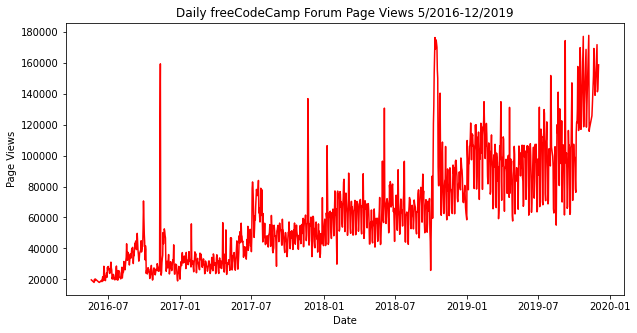

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index,df['value'],'r')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

Save image

In [20]:
fig.savefig('line_plot.png')

2. bar chart show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [35]:
df['month'] = df.index.month
df['year'] = df.index.year

Copy and modify data for monthly bar plot

In [40]:
df_bar = df.groupby(['year','month'])['value'].mean()
df_bar = df_bar.unstack()
df_bar

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


Draw bar plot

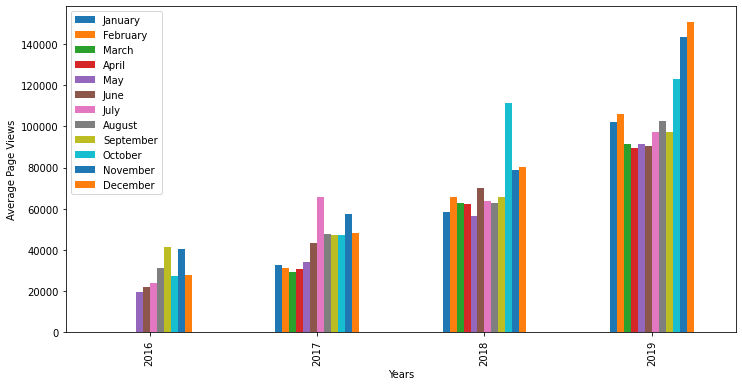

In [42]:
fig = df_bar.plot.bar(legend=True,figsize=(12,6),xlabel="Years",ylabel="Average Page Views").figure
plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'])


In [48]:
fig.savefig('bar_plot.png')

3. Draw two adjacent box plots. These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

In [43]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [44]:
df_box

,date,value,month,year
0,2016-05-19,19736,May,2016
1,2016-05-26,18060,May,2016
2,2016-05-27,19997,May,2016
3,2016-05-28,19044,May,2016
4,2016-05-29,20325,May,2016
...,...,...,...,...
1233,2019-11-24,138875,Nov,2019
1234,2019-11-29,171584,Nov,2019
1235,2019-11-30,141161,Nov,2019
1236,2019-12-01,142918,Dec,2019


Sorting data by month

In [47]:
df_box['month_num'] = df_box['date'].dt.month
df_box = df_box.sort_values('month_num')
df_box

,date,value,month,year,month_num
210,2017-01-06,37353,Jan,2017,1
593,2018-01-24,61700,Jan,2018,1
592,2018-01-23,62758,Jan,2018,1
572,2018-01-03,56013,Jan,2018,1
573,2018-01-04,58910,Jan,2018,1
...,...,...,...,...,...
902,2018-12-02,73710,Dec,2018,12
901,2018-12-01,62373,Dec,2018,12
921,2018-12-21,85083,Dec,2018,12
188,2016-12-15,42333,Dec,2016,12


Text(0, 0.5, 'Page Views')

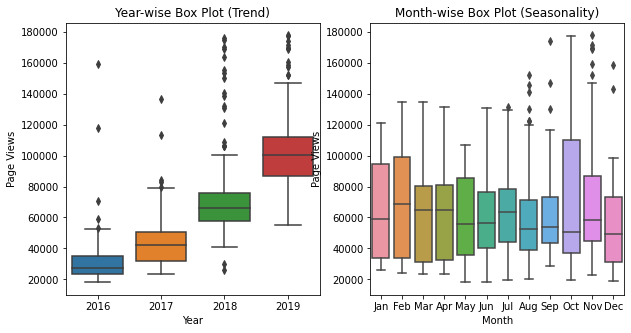

In [51]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
axes[0] = sns.boxplot(x=df_box['year'],y=df_box['value'],ax=axes[0])
axes[1] = sns.boxplot(x=df_box['month'],y=df_box['value'],ax=axes[1])

axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")

In [52]:
fig.savefig('box_plot.png')